In [322]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [323]:
 df=pd.read_csv('AB_NYC_2019.csv')
 df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [325]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Obviously, we can see there are some outliers in price and minimum nights columns and we will deal with them later.

## Data Preprocessing 

Drop useless columns and deal with missing value.

In [326]:
df.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

In [327]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [328]:
# We choose to drop last_review because the freqency of reviews can also reflect on reviews_per_month
df.drop(['last_review'], axis=1, inplace=True)
# Fill NA on 0 review per month.   
df.fillna(0, inplace=True)

Processing the dependent variable

In [329]:
# Drop the rows of abnormal prices
mask = (df['price'] <= 10) | (df['price'] >= 8000)
df = df.drop(df[mask].index)

<ipython-input-330-3018b4707dc0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], fit=norm)
<ipython-input-330-3018b4707dc0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_price'], fit=norm)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

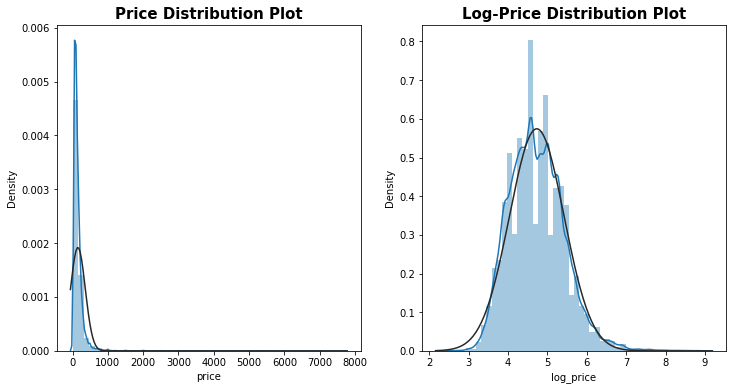

In [330]:
# Plot the distribution of price and log price.
from scipy import stats
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')
plt.subplot(1, 2, 2)
df['log_price'] = np.log(df.price)
sns.distplot(df['log_price'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

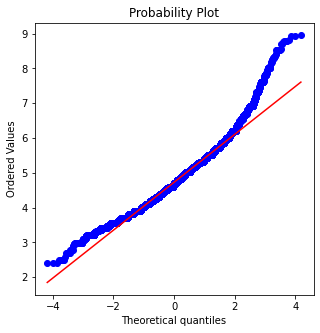

In [331]:
# We choose to use log price because it is closer to normal distribution.
df=df.drop('price', axis=1)
plt.figure(figsize=(5,5))
stats.probplot(df['log_price'],plot=plt)
plt.show()

Processing numerical data

<Axes: >

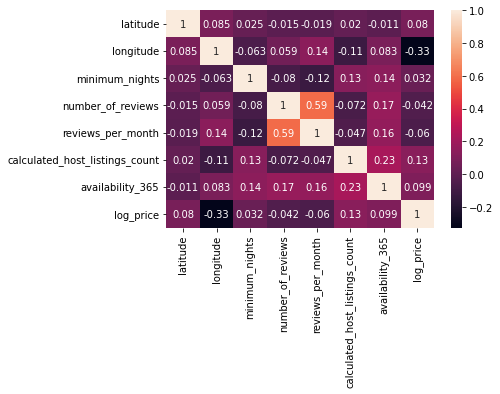

In [332]:

sns.heatmap(data=df.corr(), annot=True)

<Axes: >

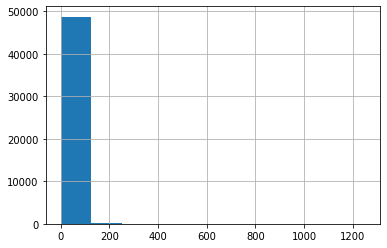

In [333]:
# Analyzing minimum nights
# We see most values are less than 100
hist_mn=df["minimum_nights"].hist()
hist_mn

<Axes: >

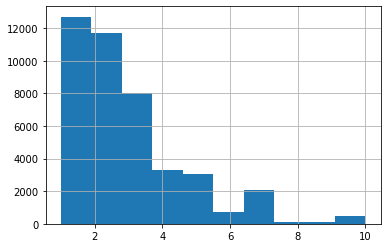

In [334]:
# Take a closer look
hist_mn2=df["minimum_nights"][df["minimum_nights"]<=10].hist()
hist_mn2

In [335]:
# We replace all records with min nights > 30 by 30
df.loc[(df.minimum_nights >30),"minimum_nights"]=30


In [336]:
num=['minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365','latitude','longitude']
df_num = df[num]
df_cat = df.drop(num, axis=1)

In [337]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Normalise the numerical data
scaler = StandardScaler()
scaler.fit(df_num)
df_scaled = scaler.transform(df_num)
df_scaled = pd.DataFrame(df_scaled, index=df_num.index, columns=df_num.columns)
df = pd.concat([df_scaled, df_cat], axis=1)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48859 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   minimum_nights                  48859 non-null  float64
 1   number_of_reviews               48859 non-null  float64
 2   reviews_per_month               48859 non-null  float64
 3   calculated_host_listings_count  48859 non-null  float64
 4   availability_365                48859 non-null  float64
 5   latitude                        48859 non-null  float64
 6   longitude                       48859 non-null  float64
 7   neighbourhood_group             48859 non-null  object 
 8   neighbourhood                   48859 non-null  object 
 9   room_type                       48859 non-null  object 
 10  log_price                       48859 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.5+ MB


In [339]:
# Encode categorical features as integers
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col] = label_encoder.fit_transform(df[col])

In [340]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features_one_hot = pd.get_dummies(categorical_features)
df = pd.concat([df_scaled, categorical_features_one_hot,df['log_price']], axis=1)
df.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,log_price
0,-0.570919,-0.320444,-0.551547,-0.034810,1.916077,-1.493684,-0.437484,0,1,0,...,0,0,0,0,0,0,0,1,0,5.003946
1,-0.570919,0.487476,-0.445122,-0.156155,1.840106,0.452338,-0.684485,0,0,1,...,0,0,0,0,0,0,1,0,0,5.416100
2,-0.340282,-0.522424,-0.683013,-0.186491,1.916077,1.468164,0.222701,0,0,1,...,0,0,0,0,0,0,0,1,0,5.010635
3,-0.570919,5.536973,2.221760,-0.186491,0.616969,-0.803326,-0.164267,0,1,0,...,0,0,0,0,0,0,1,0,0,4.488636
4,0.466948,-0.320444,-0.620410,-0.186491,-0.856873,1.275450,0.177418,0,0,1,...,0,0,0,0,0,0,1,0,0,4.382027


## Model Learning

In [341]:
y=df['log_price']
X=df.drop(['log_price'], axis=1)

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [343]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor, ExtraTreesRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [344]:
# Train decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
pred_DT = dt_model.predict(X_test)
# Evaluate model performance
print(mean_absolute_error(y_test, pred_DT))
print(sqrt(mean_squared_error(y_test, pred_DT)))

0.43020809998875614
0.6016957873913453


In [347]:
# Train Bagging model
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train, y_train)
pred_B = bagging_model.predict(X_test)
# Evaluate model performance
print(mean_absolute_error(y_test, pred_B))
print(sqrt(mean_squared_error(y_test, pred_B)))

0.32750151506768604
0.45294552195462556


In [348]:
# Train Random Forest model
model_RF = RandomForestRegressor(random_state=42)
model_RF.fit(X_train, y_train)
pred_RF = model_RF.predict(X_test)
print(mean_absolute_error(y_test, pred_RF))
print(sqrt(mean_squared_error(y_test, pred_RF)))

0.31176479000719415
0.4358859275791973


In [349]:
# Extremely Randomized Forest
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)
pred_ET = et_model.predict(X_test)
print(mean_absolute_error(y_test, pred_ET))
print(sqrt(mean_squared_error(y_test, pred_ET)))

0.3160346318637996
0.4459317841306145


In [350]:
# Train Gradient Boosting model
model_GB = GradientBoostingRegressor(random_state=42)
model_GB.fit(X_train, y_train)
pred_GB = model_GB.predict(X_test)
print(mean_absolute_error(y_test, pred_GB))
print(sqrt(mean_squared_error(y_test, pred_GB)))

0.3212068218747679
0.4434830874801162


In [351]:
# Train Adaboost model
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)
pred_ADA = ada_model.predict(X_test)
print(mean_absolute_error(y_test, pred_ADA))
print(sqrt(mean_squared_error(y_test, pred_ADA)))

0.5398898176604771
0.6673757769110873


In [352]:
model_XGB = XGBRegressor(random_state=42)
model_XGB.fit(X_train, y_train)
pred_XGB = model_XGB.predict(X_test)
print(mean_absolute_error(y_test, pred_XGB))
print(sqrt(mean_squared_error(y_test, pred_XGB)))

0.3124907601738599
0.43355587472744195


In [353]:
# List of models
models = ['Decision Tree', 'Bagging', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'Adaboost', 'XGBoost']

# List of MAE values
mae = [mean_absolute_error(y_test, pred_DT), mean_absolute_error(y_test, pred_B), mean_absolute_error(y_test, pred_RF),
       mean_absolute_error(y_test, pred_ET), mean_absolute_error(y_test, pred_GB), mean_absolute_error(y_test, pred_ADA),
       mean_absolute_error(y_test, pred_XGB)]

# List of RMSE values
rmse = [sqrt(mean_squared_error(y_test, pred_DT)), sqrt(mean_squared_error(y_test, pred_B)), sqrt(mean_squared_error(y_test, pred_RF)),
        sqrt(mean_squared_error(y_test, pred_ET)), sqrt(mean_squared_error(y_test, pred_GB)), sqrt(mean_squared_error(y_test, pred_ADA)),
        sqrt(mean_squared_error(y_test, pred_XGB))]

Text(0, 0.5, 'RMSE')

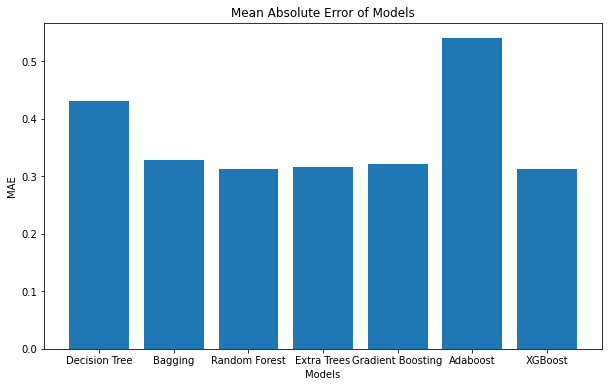

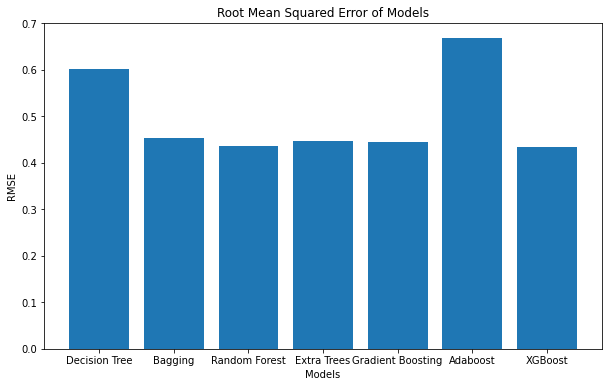

In [354]:
# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae)
plt.title('Mean Absolute Error of Models')
plt.xlabel('Models')
plt.ylabel('MAE')

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse)
plt.title('Root Mean Squared Error of Models')
plt.xlabel('Models')
plt.ylabel('RMSE')

## Tuning parameters with GridSearch

Decision tree

In [355]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_leaf': [1, 2, 4, 6],
              'min_samples_split': [2, 4, 6, 8]}

# Create a decision tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)

# Use the best parameters to make predictions
pred_DT = grid_search.predict(X_test)

# Evaluate model performance
print("MAE: ", mean_absolute_error(y_test, pred_DT))
print("RMSE: ", sqrt(mean_squared_error(y_test, pred_DT)))

Best parameters:  {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best score:  0.5539553635320068
MAE:  0.33054369732732997
RMSE:  0.45814129904917916


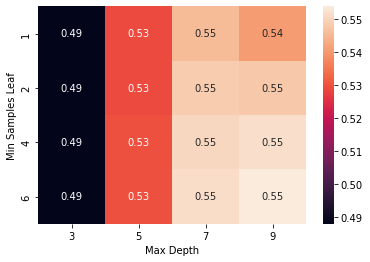

In [356]:
# Import seaborn
import seaborn as sns
results = pd.DataFrame(grid_search.cv_results_)
# Get the mean test scores for each combination of parameters
scores = results.pivot_table(values='mean_test_score', index='param_min_samples_leaf', columns='param_max_depth')

# Plot the heatmap
sns.heatmap(scores, annot=True)
plt.xlabel("Max Depth")
plt.ylabel("Min Samples Leaf")
plt.show()

Bagging

In [361]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200],
              'max_samples': [0.1, 0.25, 0.5, 0.75]}
grid_search = GridSearchCV(bagging_model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
bagging_model = BaggingRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_samples=grid_search.best_params_['max_samples'],
                                 random_state=42)
bagging_model.fit(X_train, y_train)
pred_B = bagging_model.predict(X_test)
print(mean_absolute_error(y_test, pred_B))
print(sqrt(mean_squared_error(y_test, pred_B)))

{'max_samples': 0.5, 'n_estimators': 200}
0.3085306832025215
0.43042875993910107


Random Forest

In [363]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model_RF, param_grid, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)

# Use the best parameters to make predictions
pred_RF = grid_search.predict(X_test)

# Evaluate model performance
print("MAE: ", mean_absolute_error(y_test, pred_RF))
print("RMSE: ", sqrt(mean_squared_error(y_test, pred_RF)))

Best parameters:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
Best score:  -0.312020842763566
MAE:  0.309544823141019
RMSE:  0.43195177460284584


Extremely Randomized Forest

In [365]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import numpy as np

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["friedman_mse"]}

n_iter_search = 50
et_model = ExtraTreesRegressor(random_state=42)
random_search = RandomizedSearchCV(et_model, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(X_train, y_train)
pred_ET = random_search.predict(X_test)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)
print("RMSE: ", sqrt(mean_squared_error(y_test, pred_ET)))
print("MAE: ", mean_absolute_error(y_test, pred_ET))


Best parameters found:  {'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 9, 'min_samples_split': 5}
Best score found:  0.6023423630485711
RMSE:  0.4318438434894212
MAE:  0.30811051765137637


GBRT

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_grid = {'n_estimators': randint(100, 500),
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'min_samples_leaf': randint(1, 5),
              'max_features': [0.1, 0.5, 1]}
model = GradientBoostingRegressor(random_state=42)

rnd_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

print("Best parameters: ", rnd_search.best_params_)
print("Best negative MSE: ", rnd_search.best_score_)

best_model = rnd_search.best_estimator_
pred_GB = best_model.predict(X_test)
print("RMSE: ", sqrt(mean_squared_error(y_test, pred_GB)))
print("MAE: ", mean_absolute_error(y_test, pred_GB))


Adaboost

In [ ]:
# Define the model
ada_model = AdaBoostRegressor()

# Define the hyperparameters to search
param_dist = {'n_estimators': [50, 100, 200, 500],
              'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5, 1],
             }

# Define the random search
random_search = RandomizedSearchCV(ada_model, param_distributions=param_dist, n_iter=30, cv=5, scoring='neg_mean_squared_error')

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
ada_model = AdaBoostRegressor(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
ada_model.fit(X_train, y_train)

# Make predictions
pred_ADA = ada_model.predict(X_test)

# Evaluate the model performance
print("Best parameters:", best_params)
print("Best score found: ", random_search.best_score_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_ADA)))
print("MAE:", mean_absolute_error(y_test, pred_ADA))

XGB

In [ ]:
import xgboost as xgb
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize XGBoost model
model_XGB = xgb.XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model_XGB, param_distributions=param_grid, cv=5, n_iter=30, scoring='neg_mean_squared_error', random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Use the best parameters to make predictions
model_XGB = xgb.XGBRegressor(**best_params, random_state=42)
model_XGB.fit(X_train, y_train)
pred_XGB = model_XGB.predict(X_test)

# Evaluate model performance
print("Best score: ", random_search.best_score_)
print("Best parameters: ", best_params)
print("RMSE: ", sqrt(mean_squared_error(y_test, pred_XGB)))
print("MAE: ", mean_absolute_error(y_test, pred_XGB))